In [1]:
import sys

sys.path.append("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv")
import torch
import numpy as np
from resnet_model import new_ResNet18
from prepare_data import distributed_cifar10_dataloaders
from training import train_PullSum
from useful_functions import *
from new_network_func import *

In [2]:
n = 20
batch_size = 128

CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)

trainloader_list, testloader = distributed_cifar10_dataloaders(
    n, batch_size=batch_size, root=CIFAR10_root, seed=42
)

In [3]:
I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
from network_func import di_ring
A,C=di_ring(n=n)
B=get_B(A=A,u=2*n,n=n)

""" A, B = R, R """
show_row(A)
_, __ = test_row(A)
print(f"{_:.4e}, {__:.4e}")

A的第二大特征值: 0.9528743933090136
A的beta: 0.9876933686892809
A的spectral gap: 0.012306631310719074
A的kappa: 2.000000000000011
S_A是: 1230.5535433881282 

1.9986e+00, 6.2915e+05


In [ ]:
lr = 9e-4
epochs = 200
warm_up = False

train_loss_history, test_loss_history, test_accuracy_history = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验结果/Ring1, n={n}, lr={lr}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)

optimizer初始化成功!


Training Progress:  29%|██▉       | 58/200 [10:23<25:12, 10.65s/it, epoch=58, test_accuracy=39.1700000000%, test_loss=1.6484615469, train_loss=1.8484247139]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验结果/Ring1, n=20, lr=0.001, batch_size=128.csv")
df2=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验结果/Ring1, n=20, lr=0.002, batch_size=128.csv")
df3=pd.read_csv("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验结果/Ring1, n=20, lr=0.0008, batch_size=128.csv")

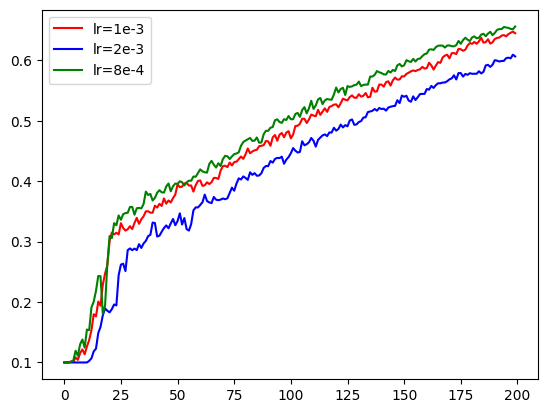

In [11]:
a=200
plt.plot(df1["Test_Accuracy"][:a],color='r',label='lr=1e-3')
plt.plot(df2["Test_Accuracy"][:a],color='b',label='lr=2e-3')
plt.plot(df3["Test_Accuracy"][:a],color='g',label='lr=8e-4')
plt.legend()
plt.show()